# Objective

Build and compare Linear Regression, Polynomial Regression, Multiple Linear Regression, KNN Regression, and Decision Tree Regression using a housing price dataset.

The workflow includes:
1.   Data preprocessing
2.   Model implementation
3.   Evaluation using regression metrics
4.   Visualization of results
5.   Testing with unseen data



## Import Required Libraries

This section imports all the Python libraries needed for data handling, preprocessing, model building, evaluation, and visualization. pandas and numpy are used for data manipulation, matplotlib for plotting, and scikit-learn provides machine learning models and evaluation metrics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

## Load Dataset

Here, the dataset is loaded from a CSV file into a pandas DataFrame. We inspect the first few rows and dataset information to understand the structure, data types, and whether there are missing values.

In [3]:
df = pd.read_csv('Housing Price.csv')
print(df.head())
#print(df.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


## Data Preprocessing

Explanation: Data preprocessing prepares the raw dataset for modeling. This includes handling missing values, separating input features from the target variable, splitting the data into training and testing sets, and scaling features to improve model performance.

### Handle Missing Values

In [4]:
df = df.dropna()

### Separate Features and Target

(Assuming price is the target column)

In [12]:
X = df.drop('price', axis=1)
y = df['price']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

### Train–Test Split (Unseen Data)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)

### Feature Scaling (Important for KNN & Polynomial)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Regression Models Implementation

Explanation: In this section, different regression algorithms are implemented. Each model learns the relationship between the input features and house prices using the training data, then predicts prices for the test (unseen) data.

### Multiple Linear Regression

In [13]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

### Polynomial Regression

In [14]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)
y_pred_poly = poly_lr.predict(X_test_poly)

### KNN Regression

In [15]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

### Decision Tree Regression

In [16]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

## Evaluation Metrics (Regression)

Explanation: Evaluation metrics are used to measure how well each regression model performs. MAE measures average error, RMSE penalizes large errors, and R² shows how much variance in the target variable is explained by the model.

### Metrics Used
*   MAE (Mean Absolute Error)
*   RMSE (Root Mean Squared Error)
*   R² Score

In [23]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

models = {
    'Linear Regression': y_pred_lr,
    'Polynomial Regression': y_pred_poly,
    'KNN Regression': y_pred_knn,
    'Decision Tree': y_pred_dt
}


for name, pred in models.items():
    mae, rmse, r2 = evaluate_model(y_test, pred)
    print(f"{name} -> MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Linear Regression -> MAE: 970043.40, RMSE: 1324506.96, R2: 0.65
Polynomial Regression -> MAE: 1034749.27, RMSE: 1379016.47, R2: 0.62
KNN Regression -> MAE: 999594.61, RMSE: 1397854.43, R2: 0.61
Decision Tree -> MAE: 1195266.06, RMSE: 1625669.90, R2: 0.48


## Visualization

Explanation: Visualization helps in understanding model performance. By plotting actual vs predicted values and error distributions, we can visually inspect accuracy, bias, and error spread for each regression model.

### Actual vs Predicted Prices

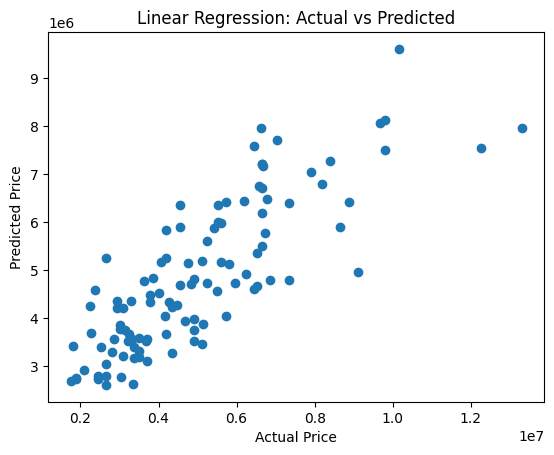

In [24]:
plt.figure()
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

## Error Distribution

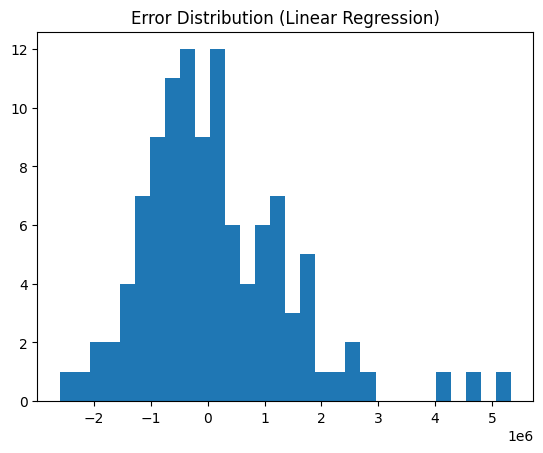

In [25]:
errors = y_test - y_pred_lr
plt.figure()
plt.hist(errors, bins=30)
plt.title('Error Distribution (Linear Regression)')
plt.show()

## Testing with Unseen Data

Explanation: This step demonstrates how the trained model can be used in real-world scenarios. New, unseen input data is scaled using the same scaler and passed to the model to predict house prices.

In [28]:
# Create a DataFrame for the new data with the same columns as X_train
# The values need to correspond to the original features and their one-hot encoded counterparts
new_data_values = {
    'area': 1200,
    'bedrooms': 3,
    'bathrooms': 2,
    'stories': 1,
    'parking': 1, # Example value
    'mainroad_yes': True, # Example value
    'guestroom_yes': False, # Example value
    'basement_yes': False, # Example value
    'hotwaterheating_yes': False, # Example value
    'airconditioning_yes': True, # Example value
    'prefarea_yes': False, # Example value
    'furnishingstatus_semi-furnished': False, # Example value, assuming unfurnished
    'furnishingstatus_unfurnished': True # Example value
}

new_data_df = pd.DataFrame([new_data_values], columns=X.columns)

# Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data_df)

# Make the prediction
prediction = lr.predict(new_data_scaled)
print('Predicted Price:', prediction[0])

Predicted Price: 4340440.729717506


## Conclusion

Explanation: The conclusion summarizes the behavior and performance of each regression model. It highlights their strengths and weaknesses and explains how to select the best-performing model based on evaluation metrics.

*  Linear & Multiple Linear Regression are good for simple relationships

*  Polynomial Regression captures non-linear patterns

*  KNN depends heavily on scaling and choice of K

*  Decision Tree can overfit but captures complex relations

Final model selection should be based on lowest RMSE and highest R² on unseen data.